## 1. Load Data  
Import libraries and load the dataset for Sierraleone.  

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


### 2. Summary Statistics

Use `df.describe()` to get a quick overview of all numeric columns, including mean, standard deviation, min, max, and quartiles.


In [19]:
print("Summary statistics:")
print(df.describe())




Summary statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50% 

### 3. Missing Value Report

Identify missing values per column to determine data completeness.  
This helps to plan imputation or cleaning strategies.


In [20]:
print("Missing values per column:")
df.isna().sum()

Missing values per column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### 4. Columns with More Than 5% Null Values

Calculate the percentage of missing values in each column and flag columns where the null rate exceeds 5%.


In [21]:
null_percent = df.isna().mean() * 100
print("Columns with more than 5% null values:")
null_percent[null_percent > 5]


Columns with more than 5% null values:


Comments    100.0
dtype: float64

### 5. Compute Z-scores for Outlier Detection

Calculate Z-scores for the main sensor and irradiance columns to detect outliers.  
Any data point with an absolute Z-score greater than 3 is considered an outlier.


In [22]:
# Compute Z-scores for selected numeric columns directly
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], nan_policy='omit'))

# Create a mask for rows that are outliers in any of these columns
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows detected: {outlier_mask.sum()}")

# Optionally preview a few of those rows
print(f"Preview a few of rows containing outliers")
df[outlier_mask].head()


Number of outlier rows detected: 16292
Preview a few of rows containing outliers


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
653,2021-10-30 10:54:00,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN
654,2021-10-30 10:55:00,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN
655,2021-10-30 10:56:00,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN
656,2021-10-30 10:57:00,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN
657,2021-10-30 10:58:00,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN


### 6. Handle Missing and Outlier Values

To clean the dataset:
- **Missing values** will be imputed using the **median** of each column.  
- **Outliers** (rows with |Z| > 3) will be removed to ensure reliable analysis.


In [23]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Drop outlier rows
df_clean = df[~outlier_mask].copy()

# Impute missing values with median
df_clean[key_columns] = df_clean[key_columns].fillna(df_clean[key_columns].median())

print(f"Cleaned dataset shape: {df_clean.shape}")


Cleaned dataset shape: (509308, 19)


### 7. Export Cleaned Dataset
Export the cleaned dataset for Sieraleone to the `data/` directory.  

In [24]:
output_path = '../data/Sieraleone_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset exported to: {output_path}")


Cleaned dataset exported to: ../data/Sieraleone_clean.csv


## 8. Time Series Analysis
Visualize how solar irradiance and temperature variables (GHI, DNI, DHI, Tamb) change over time.  
Also observe patterns across months and hours to identify peaks, drops, or anomalies.


<Figure size 1400x600 with 0 Axes>

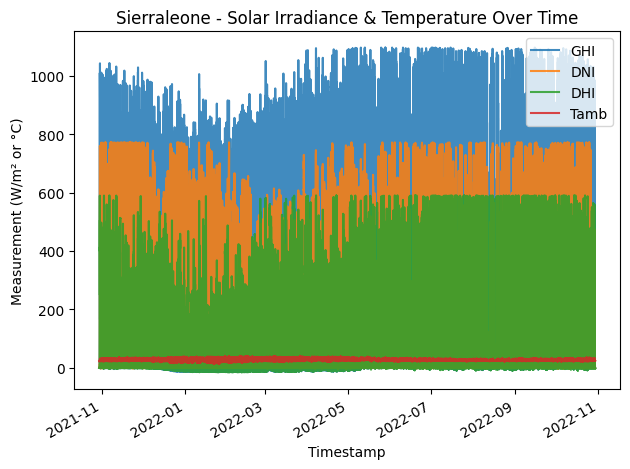

In [25]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb vs time
plt.figure(figsize=(14,6))
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.85)
plt.title("Sierraleone - Solar Irradiance & Temperature Over Time")
plt.ylabel("Measurement (W/m² or °C)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


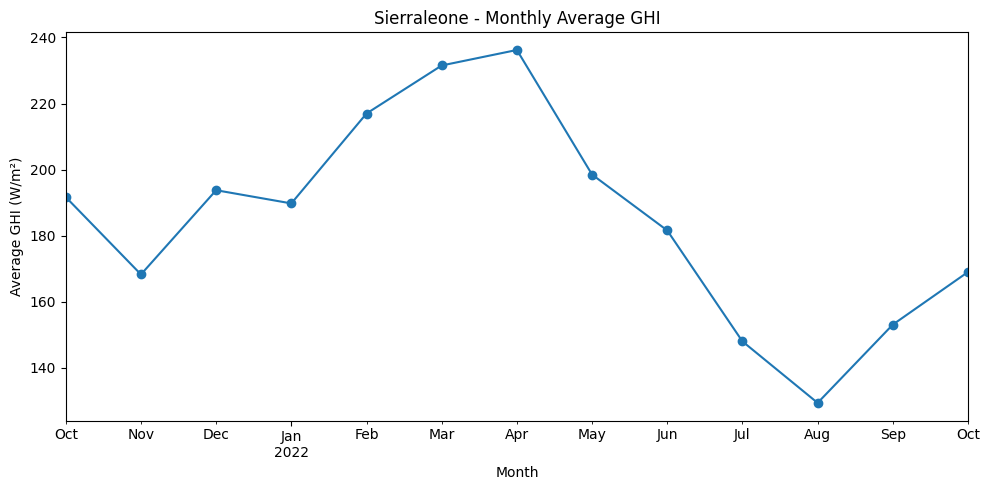

In [26]:
# Monthly average GHI
monthly_avg = df_clean.resample('ME').mean()

plt.figure(figsize=(10,5))
monthly_avg['GHI'].plot(marker='o', linestyle='-')
plt.title("Sierraleone - Monthly Average GHI")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


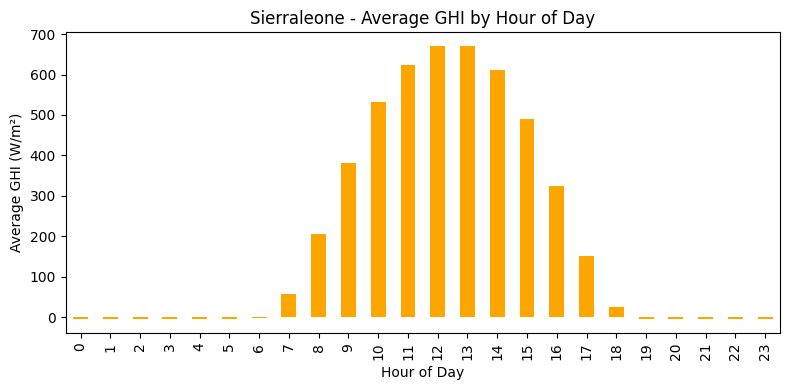

In [27]:
# Hourly pattern
df_clean['hour'] = df_clean.index.hour
hourly_avg = df_clean.groupby('hour')['GHI'].mean()

plt.figure(figsize=(8,4))
hourly_avg.plot(kind='bar', color='orange')
plt.title("Sierraleone - Average GHI by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.show()


### 9. Cleaning Impact
Analyze how solar panel cleaning affects module readings (ModA & ModB).  
We compare average readings for cleaned vs uncleaned states.


Mean Module Readings by Cleaning Flag:
   Cleaning        ModA        ModB
0         0  189.680780  181.598521
1         1  273.309252  277.231102


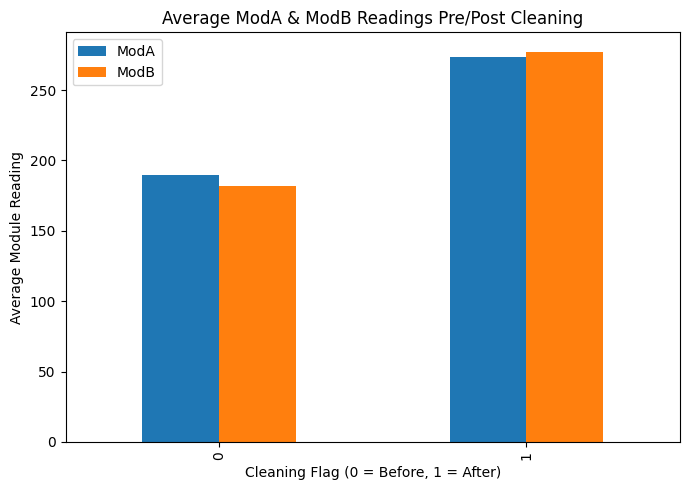

In [28]:
if 'Cleaning' in df_clean.columns:
    grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
    print("Mean Module Readings by Cleaning Flag:")
    print(grouped)

    grouped.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar', figsize=(7,5))
    plt.title("Average ModA & ModB Readings Pre/Post Cleaning")
    plt.ylabel("Average Module Reading")
    plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Cleaning' not found in dataset — skipping this step.")


### 10. Correlation & Relationship Analysis
Examine correlations between key solar parameters to identify which factors move together.  
A heatmap highlights strong positive or negative relationships.


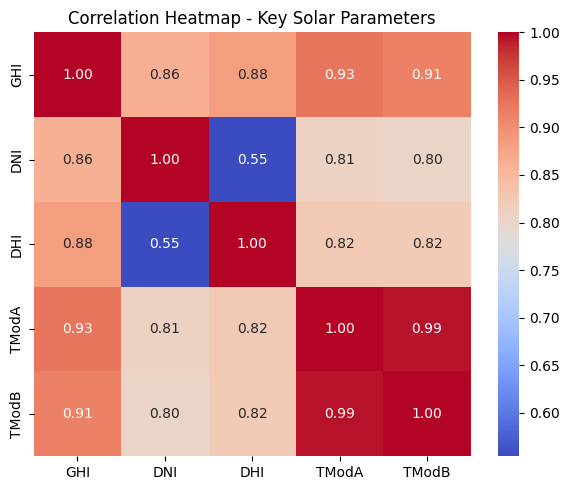

In [29]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(6,5))
sns.heatmap(df_clean[corr_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Key Solar Parameters")
plt.tight_layout()
plt.show()


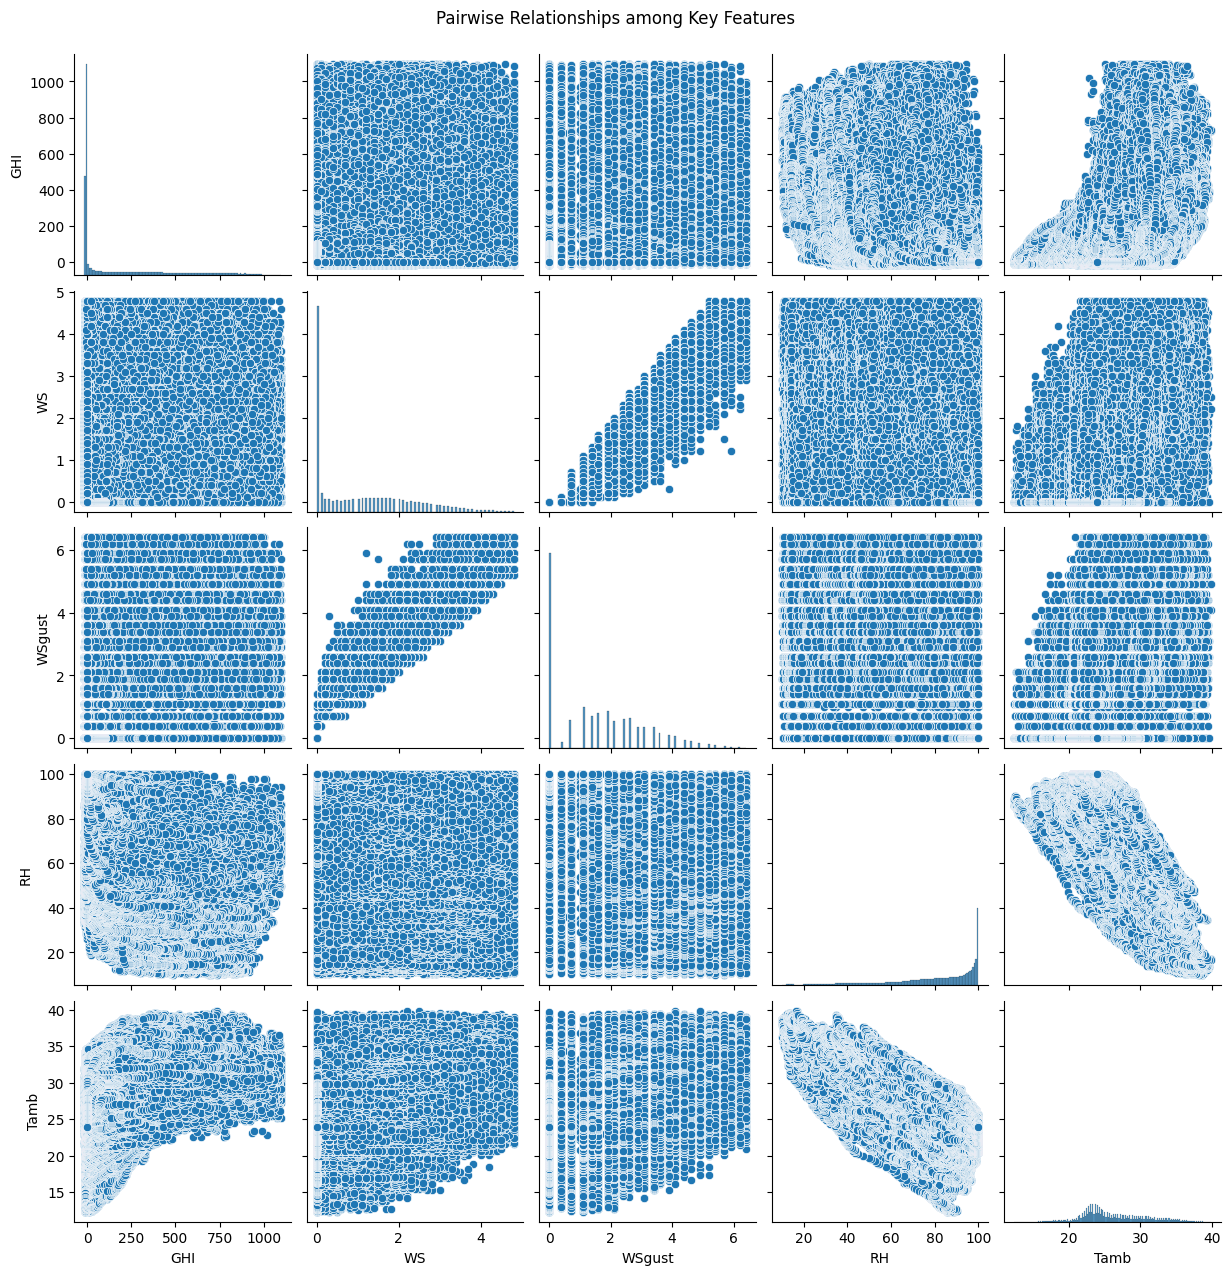

In [30]:
sns.pairplot(df_clean, vars=['GHI', 'WS', 'WSgust', 'RH', 'Tamb'], diag_kind='hist')
plt.suptitle("Pairwise Relationships among Key Features", y=1.02)
plt.show()


### 11. Wind & Distribution Analysis
Study wind behavior and irradiance distribution using histograms and wind direction patterns.


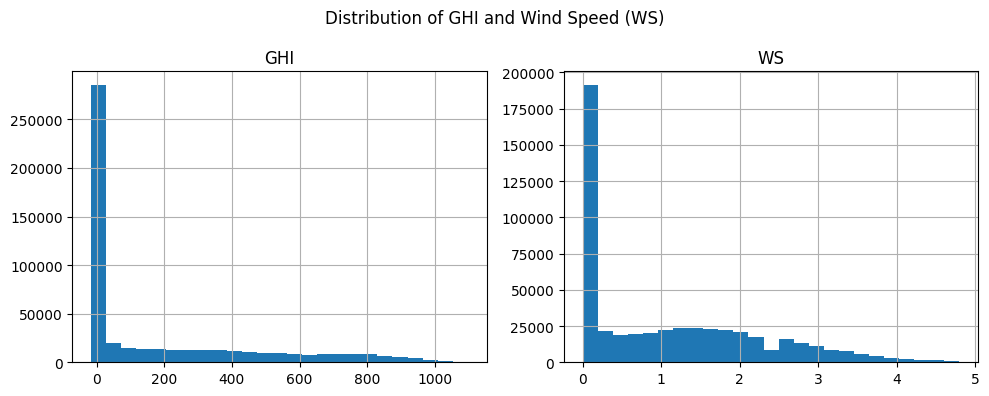

In [31]:
# Histograms for GHI and WS
df_clean[['GHI', 'WS']].hist(bins=25, figsize=(10,4))
plt.suptitle("Distribution of GHI and Wind Speed (WS)")
plt.tight_layout()
plt.show()


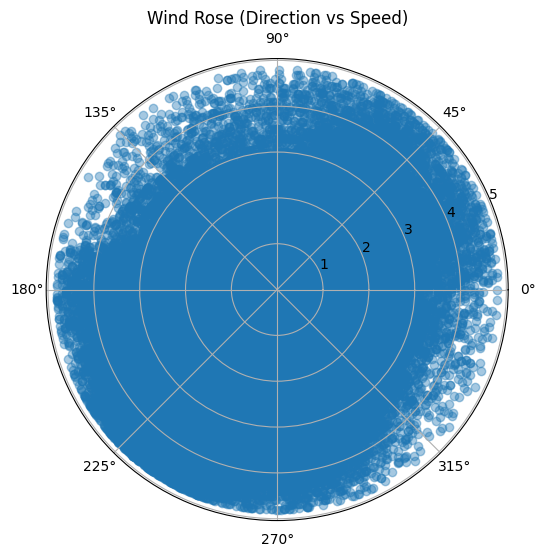

In [32]:
# Simple Wind Rose approximation (polar plot)
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    theta = np.deg2rad(df_clean['WD'])
    radii = df_clean['WS']
    ax.scatter(theta, radii, alpha=0.4)
    ax.set_title("Wind Rose (Direction vs Speed)")
    plt.show()


### 12. Temperature Analysis
Investigate how relative humidity (RH) influences temperature (Tamb) and solar irradiance (GHI).


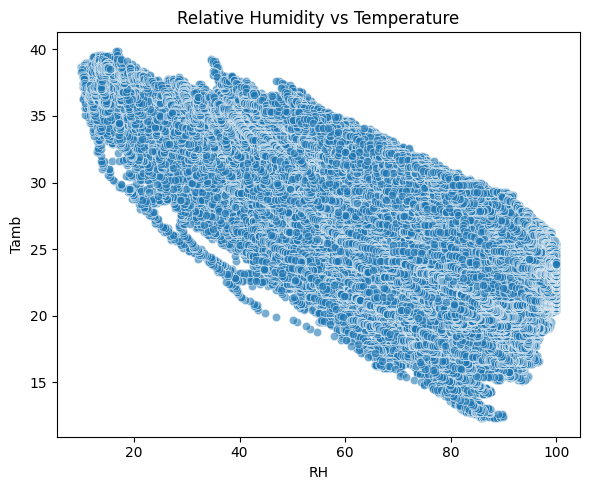

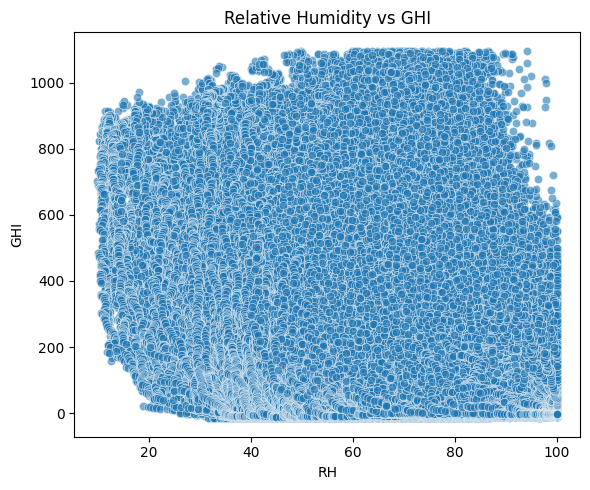

In [33]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs Temperature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs GHI")
plt.tight_layout()
plt.show()


### 13. Bubble Chart
Create a bubble chart showing how temperature (Tamb) and humidity (RH) interact with solar radiation (GHI).  
Bubble size represents pressure (BP) or humidity (RH).


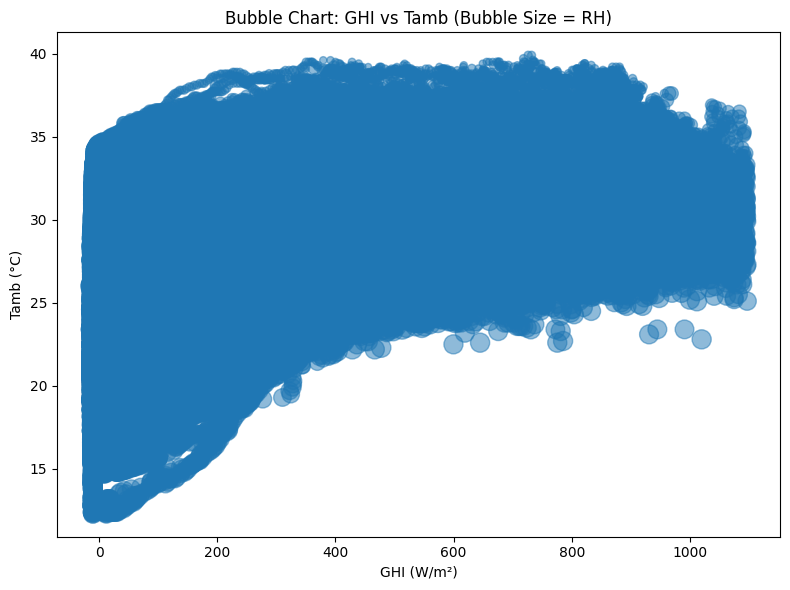

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH']*2, alpha=0.5)
plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.tight_layout()
plt.show()
